In [1]:
from __future__ import division, print_function
from gensim import models
import numpy as np
import pandas as pd
import os
import collections
import re
import string
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import preprocessing
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from google.colab import files
uploaded = files.upload ()

Saving text_emotion.csv to text_emotion.csv


In [3]:
data = pd.read_csv('text_emotion.csv')

In [4]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
data1 = data.drop(['tweet_id', 'author'], axis=1)
data1

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [6]:
data1.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [7]:
data1.loc[data1['sentiment'] == 'worry']

,sentiment,content
5,worry,Re-pinging @ghostridah14: why didn't you go to...
7,worry,Hmmm. http://www.djhero.com/ is down
11,worry,Choked on her retainers
18,worry,@PerezHilton lady gaga tweeted about not being...
20,worry,@raaaaaaek oh too bad! I hope it gets better. ...
...,...,...
39936,worry,tomorrow is going to be sooo awkward &amp; emb...
39938,worry,"@icebergstorm hey! negative on the primatech, ..."
39941,worry,@PH7S sure. But be careful also of making stat...
39956,worry,How Do You Sleep - Jesse McCartney


In [8]:
data1.loc[data1['sentiment'] == 'sadness']

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
6,sadness,"I should be sleep, but im not! thinking about ..."
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?
...,...,...
39882,sadness,Heaps keen for next weekend. Mummy. &lt;3
39894,sadness,@renagades Have a great day..... if the rain k...
39909,sadness,@Ssisch Hmmm... Sisch &amp; sound design. So w...
39939,sadness,@watermelon39 haha! And Twitter! Hard though i...


In [9]:
data1.loc[data1['sentiment'] == 'hate']

,sentiment,content
30,hate,It is so annoying when she starts typing on he...
86,hate,dammit! hulu desktop has totally screwed up my...
99,hate,@ cayogial i wanted to come to BZ this summer ...
101,hate,@mrgenius23 You win ... SIGH Rakeem
105,hate,"@soviet_star Damn, that sucks"
...,...,...
39504,hate,"@GeminiAngel24 lol, my current mp3 player is a..."
39614,hate,"@Rove1974 LOL @ the cards. So very, very wrong"
39624,hate,@cristinica21 kill her
39759,hate,@n00rtje Thanks I'll explain on msn or someth...


In [10]:
data1.loc[data1['sentiment'] == 'anger']

,sentiment,content
494,anger,fuckin'm transtelecom
527,anger,Working But it's Fridaaaayyyyy
612,anger,Packing I don't like it..
1377,anger,I tried to dye my hair and all i got was a blo...
1384,anger,&quot;locked up abroad&quot; makes bein half b...
...,...,...
34762,anger,my gawwddd ! 6 headshotss inna row? im on fyaa...
35160,anger,I'm way to sleepy.. Ill watch my shows lata..G...
35913,anger,@NerdIndian Take that back. I am insulted.
36211,anger,@anieszkaa haha i did a ltiitle bit yesterday ...


In [11]:
neg_value = (8459 / 40000)*100
print("Worry label is",neg_value,"%")
neg_value = (5165 / 40000)*100
print("sadness label is",neg_value,"%")
neg_value = (1323 / 40000)*100
print("hate label is",neg_value,"%")
neg_value = (110 / 40000)*100
print("anger label is",neg_value,"%")

Worry label is 21.1475 %
sadness label is 12.9125 %
hate label is 3.3075 %
anger label is 0.27499999999999997 %


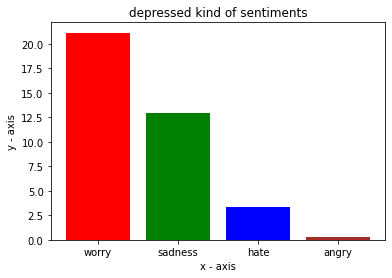

In [12]:

import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1,2,3,4] 
  
percent = [21.15,12.91,3.30,0.24] 
  
# labels for bars 
tick_label = ['worry','sadness','hate','angry'] 
  
# plotting a bar chart 
plt.bar(left, percent, tick_label = tick_label, 
        width = 0.8, color = ['red','green','blue','brown']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('depressed kind of sentiments') 
  
# function to show the plot 
plt.show() 

In [13]:
data1['sentiment'] = data1['sentiment'].replace('empty','negative')
data1['sentiment'] = data1['sentiment'].replace('neutral','positive')
data1['sentiment'] = data1['sentiment'].replace('boredom','negative')
data1['sentiment'] = data1['sentiment'].replace('happiness','positive')
data1['sentiment'] = data1['sentiment'].replace('love','positive')
data1['sentiment'] = data1['sentiment'].replace('surprise','positive')
data1['sentiment'] = data1['sentiment'].replace('fun','positive')
data1['sentiment'] = data1['sentiment'].replace('relief','positive')
data1['sentiment'] = data1['sentiment'].replace('enthusiasm','positive')
data1['sentiment'] = data1['sentiment'].replace('worry','negative')
data1['sentiment'] = data1['sentiment'].replace('sadness','negative')
data1['sentiment'] = data1['sentiment'].replace('hate','negative')
data1['sentiment'] = data1['sentiment'].replace('anger','negative')
data1['sentiment'] 

0        negative
1        negative
2        negative
3        positive
4        positive
           ...   
39995    positive
39996    positive
39997    positive
39998    positive
39999    positive
Name: sentiment, Length: 40000, dtype: object

In [14]:
data1.sentiment.value_counts()

positive    23937
negative    16063
Name: sentiment, dtype: int64

In [15]:
data1_2cat = data1

In [16]:
data1

,sentiment,content
0,negative,@tiffanylue i know i was listenin to bad habi...
1,negative,Layin n bed with a headache ughhhh...waitin o...
2,negative,Funeral ceremony...gloomy friday...
3,positive,wants to hang out with friends SOON!
4,positive,@dannycastillo We want to trade with someone w...
...,...,...
39995,positive,@JohnLloydTaylor
39996,positive,Happy Mothers Day All my love
39997,positive,Happy Mother's Day to all the mommies out ther...
39998,positive,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [17]:
pos_value = (23937 / 40000)*100
print("positive label is",pos_value,"%")

neg_value = (16063/ 40000)*100
print("negative label is",neg_value,"%")



positive label is 59.8425 %
negative label is 40.1575 %


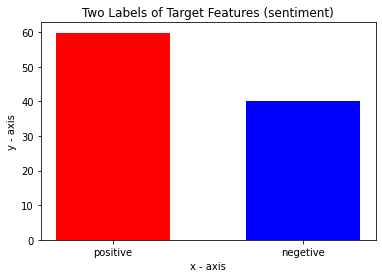

In [18]:

import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2] 
  
percent = [59.8425,40.1575 ] 
  
# labels for bars 
tick_label = ['positive', 'negetive'] 
  
# plotting a bar chart 
plt.bar(left, percent, tick_label = tick_label, 
        width = 0.6, color = ['red', "blue"]) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Two Labels of Target Features (sentiment)') 
  
# function to show the plot 
plt.show() 

In [19]:
data1.shape

(40000, 2)

In [20]:
data1.sentiment.value_counts()

positive    23937
negative    16063
Name: sentiment, dtype: int64

In [21]:
le = preprocessing.LabelEncoder()
le1 = le.fit(data1['sentiment'])
data1['sentiment'] = le1.transform(data1['sentiment']) 
data1


,sentiment,content
0,0,@tiffanylue i know i was listenin to bad habi...
1,0,Layin n bed with a headache ughhhh...waitin o...
2,0,Funeral ceremony...gloomy friday...
3,1,wants to hang out with friends SOON!
4,1,@dannycastillo We want to trade with someone w...
...,...,...
39995,1,@JohnLloydTaylor
39996,1,Happy Mothers Day All my love
39997,1,Happy Mother's Day to all the mommies out ther...
39998,1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [22]:
import re
import string  
def remove_punct(content):
    content_nopunct = ''
    content_nopunct = re.sub('['+string.punctuation+']', '', content)
    return content_nopunct
data1['Content_Clean'] = data1['content'].apply(lambda x: remove_punct(x))

In [23]:
data1['Content_Clean']

0        tiffanylue i know  i was listenin to bad habit...
1        Layin n bed with a headache  ughhhhwaitin on y...
2                            Funeral ceremonygloomy friday
3                      wants to hang out with friends SOON
4        dannycastillo We want to trade with someone wh...
                               ...                        
39995                                      JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mothers Day to all the mommies out there...
39998    niariley WASSUP BEAUTIFUL FOLLOW ME  PEEP OUT ...
39999    mopedronin bullet train from tokyo    the gf a...
Name: Content_Clean, Length: 40000, dtype: object

In [24]:
 import nltk
nltk.download('punkt')
from nltk import word_tokenize
tokens = [word_tokenize(sen) for sen in data1.Content_Clean]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens]

In [26]:
stoplist = stopwords.words('english')

def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens]
data1['Content_Final'] = [' '.join(sen) for sen in filtered_words]
data1['tokens'] = filtered_words

In [27]:
data1['tokens']

0        [tiffanylue, know, listenin, bad, habit, earli...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                             [wants, hang, friends, soon]
4        [dannycastillo, want, trade, someone, houston,...
                               ...                        
39995                                    [johnlloydtaylor]
39996                          [happy, mothers, day, love]
39997    [happy, mothers, day, mommies, woman, man, lon...
39998    [niariley, wassup, beautiful, follow, peep, ne...
39999    [mopedronin, bullet, train, tokyo, gf, visitin...
Name: tokens, Length: 40000, dtype: object

In [28]:
tokens

[['tiffanylue',
  'i',
  'know',
  'i',
  'was',
  'listenin',
  'to',
  'bad',
  'habit',
  'earlier',
  'and',
  'i',
  'started',
  'freakin',
  'at',
  'his',
  'part'],
 ['Layin',
  'n',
  'bed',
  'with',
  'a',
  'headache',
  'ughhhhwaitin',
  'on',
  'your',
  'call'],
 ['Funeral', 'ceremonygloomy', 'friday'],
 ['wants', 'to', 'hang', 'out', 'with', 'friends', 'SOON'],
 ['dannycastillo',
  'We',
  'want',
  'to',
  'trade',
  'with',
  'someone',
  'who',
  'has',
  'Houston',
  'tickets',
  'but',
  'no',
  'one',
  'will'],
 ['Repinging',
  'ghostridah14',
  'why',
  'didnt',
  'you',
  'go',
  'to',
  'prom',
  'BC',
  'my',
  'bf',
  'didnt',
  'like',
  'my',
  'friends'],
 ['I',
  'should',
  'be',
  'sleep',
  'but',
  'im',
  'not',
  'thinking',
  'about',
  'an',
  'old',
  'friend',
  'who',
  'I',
  'want',
  'but',
  'hes',
  'married',
  'now',
  'damn',
  'amp',
  'he',
  'wants',
  'me',
  '2',
  'scandalous'],
 ['Hmmm', 'httpwwwdjherocom', 'is', 'down'],
 ['ch

In [29]:
data1

,sentiment,content,Content_Clean,Content_Final,tokens
0,0,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit...,tiffanylue know listenin bad habit earlier sta...,"[tiffanylue, know, listenin, bad, habit, earli..."
1,0,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhhwaitin on y...,layin n bed headache ughhhhwaitin call,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,0,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]"
3,1,wants to hang out with friends SOON!,wants to hang out with friends SOON,wants hang friends soon,"[wants, hang, friends, soon]"
4,1,@dannycastillo We want to trade with someone w...,dannycastillo We want to trade with someone wh...,dannycastillo want trade someone houston ticke...,"[dannycastillo, want, trade, someone, houston,..."
...,...,...,...,...,...
39995,1,@JohnLloydTaylor,JohnLloydTaylor,johnlloydtaylor,[johnlloydtaylor]
39996,1,Happy Mothers Day All my love,Happy Mothers Day All my love,happy mothers day love,"[happy, mothers, day, love]"
39997,1,Happy Mother's Day to all the mommies out ther...,Happy Mothers Day to all the mommies out there...,happy mothers day mommies woman man long youre...,"[happy, mothers, day, mommies, woman, man, lon..."
39998,1,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,niariley WASSUP BEAUTIFUL FOLLOW ME PEEP OUT ...,niariley wassup beautiful follow peep new hit ...,"[niariley, wassup, beautiful, follow, peep, ne..."


In [30]:
positive = []
negetive = []

for l in data1.sentiment:
    if l == 0:
        positive.append(0)
        negetive.append(1)

    elif l == 1:
        positive.append(1)
        negetive.append(0)
    
data1['positive']= positive
data1['negetive']= negetive


data1 = data1[['Content_Final', 'tokens', 'sentiment', 'positive', 'negetive']]
data1.head()

,Content_Final,tokens,sentiment,positive,negetive
0,tiffanylue know listenin bad habit earlier sta...,"[tiffanylue, know, listenin, bad, habit, earli...",0,0,1
1,layin n bed headache ughhhhwaitin call,"[layin, n, bed, headache, ughhhhwaitin, call]",0,0,1
2,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",0,0,1
3,wants hang friends soon,"[wants, hang, friends, soon]",1,1,0
4,dannycastillo want trade someone houston ticke...,"[dannycastillo, want, trade, someone, houston,...",1,1,0


In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1, 
                                         test_size=0.3, 
                                         random_state=42)

In [32]:
print(data_train)

                                           Content_Final  ... negetive
38015  ficklampa hehe option advertising world wasnt ...  ...        1
2281   woke day need go work sucks also go dentist fi...  ...        1
36629                              ilhongy would get u u  ...        0
6087          penbleth dont leave forever well miss much  ...        1
11792  lt training today ehhh hard tall hard feels go...  ...        0
...                                                  ...  ...      ...
6265                                            cleaning  ...        0
11284               ooo goddddd vodafone trouble network  ...        1
38158             watching run fat boy runhaha soo funny  ...        0
860    calvinharris make pork products theyve fucking...  ...        1
15795  billfanning bill likewise pleasure next time s...  ...        0

[28000 rows x 5 columns]


In [33]:
print (data_test)

                                           Content_Final  ... negetive
32823                                       good morning  ...        0
16298  put computer craigslist ive case monitor speak...  ...        1
28505  ten minutes shopping demi lovatoback around de...  ...        0
6689   twitterberry moved ubertwitter suffered bb cac...  ...        0
26893                                    thriftymom tear  ...        1
...                                                  ...  ...      ...
3779                                  dont like funerals  ...        1
11973         nooooooooooooo amandas cut hair loved hair  ...        0
35668                             abcddesigns ever sleep  ...        0
483    damohopo stephanieellen told often wash hair w...  ...        1
1380   fam back big island said vog bad cant see ocea...  ...        1

[12000 rows x 5 columns]


In [34]:
all_training_words = [word for tokens in data_train['tokens'] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

220492 words total, with a vocabulary size of 41457
Max sentence length is 25


In [35]:
all_test_words = [word for tokens in data_test['tokens'] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test['tokens']]
TEST_VOCAB = sorted(list(set(all_test_words)))
print('%s words total, with a vocabulary size of %s' % (len(all_test_words), len(TEST_VOCAB)))
print('Max sentence length is %s' % max(test_sentence_lengths))

93974 words total, with a vocabulary size of 22111
Max sentence length is 26


In [36]:
 import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

[=================================================-] 99.7% 1658.0/1662.8MB downloaded
/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [37]:
word2vec_path = path
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [38]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [39]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)


In [40]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300

In [41]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Content_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Content_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 41451 unique tokens.


In [42]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [43]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(41452, 300)


In [44]:
test_sequences = tokenizer.texts_to_sequences(data_test["Content_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [45]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
 
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    convs = []
    filter_sizes = [2,3,4,5,6]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, 
                        kernel_size=filter_size, 
                        activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
    l_merge = concatenate(convs, axis=1)
    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [46]:
label_names = ['positive', 'negetive']
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train

In [47]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [48]:
model = ConvNet(train_embedding_weights, 
                MAX_SEQUENCE_LENGTH, 
                len(train_word_index)+1, 
                EMBEDDING_DIM, 
                len(list(label_names)))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      12435600    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 49, 200)      120200      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 48, 200)      180200      embedding[0][0]                  
_______________________________________________________________________________________

In [49]:
num_epochs = 30
batch_size = 34

In [50]:
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/30
742/742 [==============================] - 124s 167ms/step - loss: 0.6036 - acc: 0.6783 - val_loss: 0.5638 - val_acc: 0.7157
Epoch 2/30
742/742 [==============================] - 122s 165ms/step - loss: 0.5401 - acc: 0.7337 - val_loss: 0.5603 - val_acc: 0.7139
Epoch 3/30
742/742 [==============================] - 122s 165ms/step - loss: 0.4959 - acc: 0.7604 - val_loss: 0.5700 - val_acc: 0.7093
Epoch 4/30
742/742 [==============================] - 123s 166ms/step - loss: 0.4130 - acc: 0.8119 - val_loss: 0.6629 - val_acc: 0.7114
Epoch 5/30
742/742 [==============================] - 122s 164ms/step - loss: 0.3015 - acc: 0.8719 - val_loss: 0.7435 - val_acc: 0.6986
Epoch 6/30
742/742 [==============================] - 123s 166ms/step - loss: 0.2213 - acc: 0.9089 - val_loss: 0.8420 - val_acc: 0.6968
Epoch 7/30
742/742 [==============================] - 123s 166ms/step - loss: 0.1678 - acc: 0.9319 - val_loss: 1.0457 - val_acc: 0.6757
Epoch 8/30
742/742 [============================

In [63]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [64]:
import tensorflow as tf

In [65]:
new_model = tf.keras.models.load_model('/content/drive/My Drive/saved_model/my_model')


In [78]:
review = input('please enter a text :')

xtest = tokenizer.texts_to_sequences([review])
xtestm = pad_sequences(xtest, maxlen=MAX_SEQUENCE_LENGTH)
pre = new_model.predict(xtestm, batch_size=1024, verbose=1)
labels = [0,1]
prediction_labels=[]
for p in pre:
    prediction_labels.append(labels[np.argmax(p)])

print('')
if str(prediction_labels) == '[0]':
  print('Sentiment [positive] :', review)
else :
  print('Sentiment [negetive] :', review)  

please enter a text :We believe these people are thieves. The big city machines are corrupt. This was a stolen election. Best pollster in Britain wrote this morning that this clearly was a stolen election, that itÕs impossible to imagine that Biden outran Obama in some of these states.
1/1 [==============================] - 0s 1ms/step

Sentiment [negetive] : We believe these people are thieves. The big city machines are corrupt. This was a stolen election. Best pollster in Britain wrote this morning that this clearly was a stolen election, that itÕs impossible to imagine that Biden outran Obama in some of these states.


In [ ]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)
labels = [1,0]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [ ]:
predictions

array([[0.5001037 , 0.4985896 ],
       [0.5001037 , 0.4985896 ],
       [0.5001037 , 0.4985896 ],
       [0.96143   , 0.0499731 ],
       [0.5001037 , 0.4985896 ],
       [0.5001037 , 0.4985896 ],
       [0.02789584, 0.9749202 ],
       [0.05218253, 0.9535977 ],
       [0.5001037 , 0.4985896 ],
       [0.56486297, 0.46780792],
       [0.5001037 , 0.4985896 ],
       [0.99129677, 0.00803664],
       [0.37950677, 0.60973763],
       [0.5001037 , 0.49858963]], dtype=float32)

In [ ]:
sum(data_test.sentiment==prediction_labels)/len(prediction_labels)

0.68225

## CNN For POS NEG Neutral

In [ ]:
data_new = pd.read_csv('text_emotion.csv')

In [ ]:
data1_new = data_new.drop(['tweet_id', 'author'], axis=1)
data1_new

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
data1_new['sentiment'] = data1_new['sentiment'].replace('empty','neutral')
data1_new['sentiment'] = data1_new['sentiment'].replace('neutral','neutral')
data1_new['sentiment'] = data1_new['sentiment'].replace('boredom','neutral')
data1_new['sentiment'] = data1_new['sentiment'].replace('happiness','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('love','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('surprise','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('fun','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('relief','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('enthusiasm','positive')
data1_new['sentiment'] = data1_new['sentiment'].replace('worry','negetive')
data1_new['sentiment'] = data1_new['sentiment'].replace('sadness','negetive')
data1_new['sentiment'] = data1_new['sentiment'].replace('hate','negetive')
data1_new['sentiment'] = data1_new['sentiment'].replace('anger','negetive')
data1_new['sentiment'] 

0         neutral
1        negetive
2        negetive
3        positive
4         neutral
           ...   
39995     neutral
39996    positive
39997    positive
39998    positive
39999    positive
Name: sentiment, Length: 40000, dtype: object

In [ ]:
data1_new.sentiment.value_counts()

positive    15299
negetive    15057
neutral      9644
Name: sentiment, dtype: int64

In [ ]:
pos_value = (15299 / 40000)*100
print("positive label is",pos_value,"%")

neg_value = (15057 / 40000)*100
print("negetive label is",neg_value,"%")

neutral_value = (9644 / 40000)*100
print("neutral label is",neutral_value,"%")

positive label is 38.2475 %
negetive label is 37.6425 %
neutral label is 24.11 %


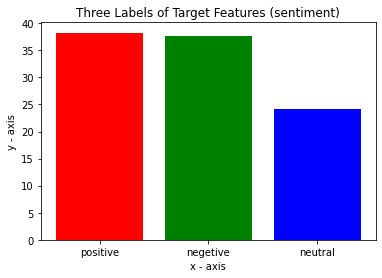

In [ ]:

import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3] 
  
percent = [38.2475, 37.6425, 24.11] 
  
# labels for bars 
tick_label = ['positive', 'negetive', 'neutral'] 
  
# plotting a bar chart 
plt.bar(left, percent, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green', "blue"]) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Three Labels of Target Features (sentiment)') 
  
# function to show the plot 
plt.show() 

In [ ]:
data_3cat = data1_new

In [ ]:
le_new = preprocessing.LabelEncoder()
le1_new = le_new.fit(data1_new['sentiment'])
data1_new['sentiment'] = le1_new.transform(data1_new['sentiment']) 
data1_new

,sentiment,content
0,1,@tiffanylue i know i was listenin to bad habi...
1,0,Layin n bed with a headache ughhhh...waitin o...
2,0,Funeral ceremony...gloomy friday...
3,2,wants to hang out with friends SOON!
4,1,@dannycastillo We want to trade with someone w...
...,...,...
39995,1,@JohnLloydTaylor
39996,2,Happy Mothers Day All my love
39997,2,Happy Mother's Day to all the mommies out ther...
39998,2,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
data1_new['sentiment'].value_counts()

2    15299
0    15057
1     9644
Name: sentiment, dtype: int64

In [ ]:
import re
import string  
def remove_punct(content):
    content_nopunct = ''
    content_nopunct = re.sub('['+string.punctuation+']', '', content)
    return content_nopunct
data1_new['Content_Clean'] = data1_new['content'].apply(lambda x: remove_punct(x))

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
tokens_new = [word_tokenize(sen) for sen in data1_new.Content_Clean]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def lower_token(tokens_new): 
    return [w.lower() for w in tokens_new]    
    
lower_tokens_new = [lower_token(token) for token in tokens_new]

In [ ]:
stoplist = stopwords.words('english')

def removeStopWords(tokens): 
    return [word for word in tokens if word not in stoplist]
filtered_words = [removeStopWords(sen) for sen in lower_tokens_new]
data1_new['Content_Final'] = [' '.join(sen) for sen in filtered_words]
data1_new['tokens'] = filtered_words

In [ ]:
data1_new['tokens']

0        [tiffanylue, know, listenin, bad, habit, earli...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                             [wants, hang, friends, soon]
4        [dannycastillo, want, trade, someone, houston,...
                               ...                        
39995                                    [johnlloydtaylor]
39996                          [happy, mothers, day, love]
39997    [happy, mothers, day, mommies, woman, man, lon...
39998    [niariley, wassup, beautiful, follow, peep, ne...
39999    [mopedronin, bullet, train, tokyo, gf, visitin...
Name: tokens, Length: 40000, dtype: object

In [ ]:
positive = []
negetive = []
neutral = []
for l in data1_new.sentiment:
    if l == 0:
        positive.append(0)
        negetive.append(1)
        neutral.append(0)
 
    elif l == 1:
        positive.append(0)
        negetive.append(0)
        neutral.append(1)
    
    elif l == 2:
        positive.append(1)
        negetive.append(0)
        neutral.append(0)     
 
data1_new['positive']= positive
data1_new['negetive']= negetive
data1_new['neutral']= neutral
 
 
data1_new = data1_new[['Content_Final', 'tokens', 'sentiment', 'positive', 'negetive','neutral']]
data1_new.head()

,Content_Final,tokens,sentiment,positive,negetive,neutral
0,tiffanylue know listenin bad habit earlier sta...,"[tiffanylue, know, listenin, bad, habit, earli...",1,0,0,1
1,layin n bed headache ughhhhwaitin call,"[layin, n, bed, headache, ughhhhwaitin, call]",0,0,1,0
2,funeral ceremonygloomy friday,"[funeral, ceremonygloomy, friday]",0,0,1,0
3,wants hang friends soon,"[wants, hang, friends, soon]",2,1,0,0
4,dannycastillo want trade someone houston ticke...,"[dannycastillo, want, trade, someone, houston,...",1,0,0,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1_new, 
                                         test_size=0.1, 
                                         random_state=42)

In [ ]:
all_training_words = [word for tokens in data_train['tokens'] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

282915 words total, with a vocabulary size of 49660
Max sentence length is 26


In [ ]:
all_test_words = [word for tokens in data_test['tokens'] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test['tokens']]
TEST_VOCAB = sorted(list(set(all_test_words)))
print('%s words total, with a vocabulary size of %s' % (len(all_test_words), len(TEST_VOCAB)))
print('Max sentence length is %s' % max(test_sentence_lengths))

31551 words total, with a vocabulary size of 9969
Max sentence length is 26


In [ ]:
import gensim.downloader as api
path = api.load("word2vec-google-news-300", return_path=True)
print(path)

/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [ ]:
word2vec_path = path
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
training_embeddings = get_word2vec_embeddings(word2vec, data_train, generate_missing=True)
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Content_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Content_Final"].tolist())
 
train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)
test_sequences = tokenizer.texts_to_sequences(data_test["Content_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

Found 49653 unique tokens.
(49654, 300)


In [ ]:
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
 
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    convs = []
    filter_sizes = [2,3,4,5,6]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, 
                        kernel_size=filter_size, 
                        activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
    l_merge = concatenate(convs, axis=1)
    x = Dropout(0.1)(l_merge)  
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [ ]:
label_names = ['positive', 'negetive','neutral']
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [ ]:
model = ConvNet(train_embedding_weights, 
                MAX_SEQUENCE_LENGTH, 
                len(train_word_index)+1, 
                EMBEDDING_DIM, 
                len(list(label_names)))

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 300)      14896200    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 49, 200)      120200      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 48, 200)      180200      embedding[0][0]                  
_______________________________________________________________________________________

In [ ]:
num_epochs = 30
batch_size = 32
hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/30
1013/1013 [==============================] - 166s 163ms/step - loss: 0.5687 - acc: 0.5350 - val_loss: 0.5534 - val_acc: 0.5497
Epoch 2/30
1013/1013 [==============================] - 166s 164ms/step - loss: 0.5236 - acc: 0.6012 - val_loss: 0.5419 - val_acc: 0.5669
Epoch 3/30
1013/1013 [==============================] - 166s 164ms/step - loss: 0.4928 - acc: 0.6342 - val_loss: 0.5503 - val_acc: 0.5658
Epoch 4/30
1013/1013 [==============================] - 166s 164ms/step - loss: 0.4326 - acc: 0.6906 - val_loss: 0.5922 - val_acc: 0.5558
Epoch 5/30
1013/1013 [==============================] - 166s 164ms/step - loss: 0.3411 - acc: 0.7679 - val_loss: 0.6835 - val_acc: 0.5325
Epoch 6/30
1013/1013 [==============================] - 166s 163ms/step - loss: 0.2602 - acc: 0.8293 - val_loss: 0.8506 - val_acc: 0.5214
Epoch 7/30
1013/1013 [==============================] - 166s 164ms/step - loss: 0.2036 - acc: 0.8680 - val_loss: 0.9571 - val_acc: 0.5106
Epoch 8/30
1013/1013 [============

In [ ]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)
labels = [1,1,1]
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

4/4 [==============================] - 6s 1s/step


In [ ]:
sum(data_test.sentiment==prediction_labels)/len(prediction_labels)


0.2415

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(data_test.sentiment, prediction_labels)

0.24283333333333335

## SVM


## three categorical value

In [ ]:
data_3cat

,sentiment,content
0,neutral,@tiffanylue i know i was listenin to bad habi...
1,negetive,Layin n bed with a headache ughhhh...waitin o...
2,negetive,Funeral ceremony...gloomy friday...
3,positive,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,positive,Happy Mothers Day All my love
39997,positive,Happy Mother's Day to all the mommies out ther...
39998,positive,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_3cat, 
                                         test_size=0.3, 
                                         random_state=42)

In [ ]:
data_train.sample(frac=1).head(30) # shuffle the df and pick first 5


,sentiment,content
22237,positive,Totally enjoying my day off woohoo for Mondays.
8123,positive,@HannahSukter anywayss to the point i am dying...
8205,negetive,@SiCoUK he won't reply
23212,neutral,Save The Readheads!
30396,positive,baseball games whoo hooo when to banquet yest...
34470,positive,Heading to XS with Nadia!! Yeee!
14503,positive,@travelingcircus Oooh you just spoiled my teen...
26759,positive,m still watchin Boston Legal tho it cracks me ...
20487,neutral,@NickHodge Bought the Repo Man soundtrack in t...
3800,neutral,"back soon, need to run to the shops and cut th..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(data_train['content'])
test_vectors = vectorizer.transform(data_test['content'])

In [ ]:
print(train_vectors)

  (0, 1272)	0.32621843065899686
  (0, 2445)	0.32202403398679413
  (0, 4576)	0.19667957815634368
  (0, 4073)	0.15663164430005952
  (0, 3416)	0.21212857568931548
  (0, 2862)	0.11773774080113421
  (0, 3235)	0.17199576684781967
  (0, 4394)	0.15514141798965236
  (0, 1629)	0.2816060227953948
  (0, 2047)	0.10987822874732403
  (0, 2576)	0.2145596808932677
  (0, 3664)	0.12201839802136444
  (0, 2552)	0.28290111868790674
  (0, 3849)	0.21574027118176944
  (0, 4377)	0.2325577853879411
  (0, 4518)	0.21758795306224382
  (0, 4003)	0.08304453412175439
  (0, 2020)	0.1648070684491339
  (0, 2885)	0.31827201830988455
  (0, 229)	0.16972676946344725
  (0, 2107)	0.09912031679511049
  (0, 1874)	0.2446685300662589
  (1, 3438)	0.326948058799639
  (1, 3760)	0.2980774235301263
  (1, 4015)	0.18041786649280797
  :	:
  (27998, 4074)	0.2943302430273416
  (27998, 3808)	0.351837830623446
  (27998, 1619)	0.30884826989357134
  (27998, 683)	0.17710571051095356
  (27998, 4022)	0.21101737860280675
  (27998, 4434)	0.272300297

In [ ]:
print(test_vectors)

  (0, 2653)	0.7811304008686812
  (0, 1710)	0.6243679178487099
  (1, 4570)	0.3139808022825813
  (1, 4311)	0.24021557112853106
  (1, 4270)	0.18573539645693382
  (1, 4003)	0.10950988285796369
  (1, 3416)	0.2797315406755739
  (1, 3195)	0.2957712939559373
  (1, 2907)	0.24838854639550054
  (1, 2862)	0.15525942001420567
  (1, 2698)	0.12748888427721772
  (1, 2639)	0.43018053512346915
  (1, 2194)	0.16607610752854848
  (1, 1787)	0.21523077209167907
  (1, 1559)	0.14526104275539414
  (1, 885)	0.3144777392007921
  (1, 708)	0.36508001253106326
  (1, 230)	0.13112982452058125
  (2, 4587)	0.08915250440231594
  (2, 4150)	0.26059639841737287
  (2, 4003)	0.0732566709144974
  (2, 3970)	0.264090437646545
  (2, 3556)	0.208741952162324
  (2, 3483)	0.20269878649431766
  (2, 3247)	0.1404676575067587
  :	:
  (11998, 2848)	0.37119561286134284
  (11998, 2755)	0.2583724289315877
  (11998, 2698)	0.12685226581349365
  (11998, 2521)	0.15493851425789923
  (11998, 2020)	0.21624396913165203
  (11998, 1971)	0.216495859791

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(C = 2, kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])
print('neutral: ', report['neutral'])

Training time: 162.562268s; Prediction time: 30.257105s
positive:  {'precision': 0.6217704362558238, 'recall': 0.6377063423110338, 'f1-score': 0.6296375723782973, 'support': 4604}
negative:  {'precision': 0.5965297167929796, 'recall': 0.6680813044449408, 'f1-score': 0.6302813191444526, 'support': 4477}
neutral:  {'precision': 0.4575971731448763, 'recall': 0.354916067146283, 'f1-score': 0.3997684738568397, 'support': 2919}


In [ ]:
report

{'accuracy': 0.58025,
 'macro avg': {'f1-score': 0.5532291217931965,
  'precision': 0.55863244206456,
  'recall': 0.5535679046340859,
  'support': 12000},
 'negetive': {'f1-score': 0.6302813191444526,
  'precision': 0.5965297167929796,
  'recall': 0.6680813044449408,
  'support': 4477},
 'neutral': {'f1-score': 0.3997684738568397,
  'precision': 0.4575971731448763,
  'recall': 0.354916067146283,
  'support': 2919},
 'positive': {'f1-score': 0.6296375723782973,
  'precision': 0.6217704362558238,
  'recall': 0.6377063423110338,
  'support': 4604},
 'weighted avg': {'f1-score': 0.5739620853522925,
  'precision': 0.5724183982511565,
  'recall': 0.58025,
  'support': 12000}}

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=rbf
classifier_linear = svm.SVC(C=2, kernel='rbf')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])
print('neutral: ', report['neutral'])

Training time: 593.854543s; Prediction time: 44.619211s
positive:  {'precision': 0.6261605116566948, 'recall': 0.6592093831450913, 'f1-score': 0.6422600782985927, 'support': 4604}
negative:  {'precision': 0.6016779864163004, 'recall': 0.6727719454992183, 'f1-score': 0.6352420120215122, 'support': 4477}
neutral:  {'precision': 0.4564508616674429, 'recall': 0.33573141486810554, 'f1-score': 0.38689301223845246, 'support': 2919}


In [ ]:
report

{'accuracy': 0.5855833333333333,
 'macro avg': {'f1-score': 0.5547983675195192,
  'precision': 0.5614297865801461,
  'recall': 0.5559042478374717,
  'support': 12000},
 'negetive': {'f1-score': 0.6352420120215122,
  'precision': 0.6016779864163004,
  'recall': 0.6727719454992183,
  'support': 4477},
 'neutral': {'f1-score': 0.38689301223845246,
  'precision': 0.4564508616674429,
  'recall': 0.33573141486810554,
  'support': 2919},
 'positive': {'f1-score': 0.6422600782985927,
  'precision': 0.6261605116566948,
  'recall': 0.6592093831450913,
  'support': 4604},
 'weighted avg': {'f1-score': 0.5775237159192561,
  'precision': 0.5757446171717054,
  'recall': 0.5855833333333333,
  'support': 12000}}

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=sigmoid
classifier_linear = svm.SVC(C=2, kernel='sigmoid')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])
print('neutral: ', report['neutral'])

Training time: 144.315243s; Prediction time: 32.938067s
positive:  {'precision': 0.613185896098477, 'recall': 0.6383579496090356, 'f1-score': 0.6255187825901883, 'support': 4604}
negative:  {'precision': 0.5876207372363493, 'recall': 0.6658476658476659, 'f1-score': 0.6242931937172774, 'support': 4477}
neutral:  {'precision': 0.436269915651359, 'recall': 0.31894484412470026, 'f1-score': 0.368493963981793, 'support': 2919}


In [ ]:
report

{'accuracy': 0.5709166666666666,
 'macro avg': {'f1-score': 0.5394353134297529,
  'precision': 0.5456921829953951,
  'recall': 0.5410501531938006,
  'support': 12000},
 'negetive': {'f1-score': 0.6242931937172774,
  'precision': 0.5876207372363493,
  'recall': 0.6658476658476659,
  'support': 4477},
 'neutral': {'f1-score': 0.368493963981793,
  'precision': 0.436269915651359,
  'recall': 0.31894484412470026,
  'support': 2919},
 'positive': {'f1-score': 0.6255187825901883,
  'precision': 0.613185896098477,
  'recall': 0.6383579496090356,
  'support': 4604},
 'weighted avg': {'f1-score': 0.5625402486816944,
  'precision': 0.5606131491692368,
  'recall': 0.5709166666666666,
  'support': 12000}}

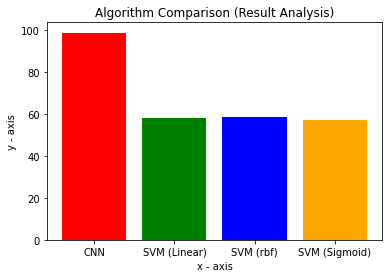

In [ ]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4] 
  
percent = [0.9878*100 , 0.58025*100, 0.58558*100, 0.57091*100] 
  
# labels for bars 
tick_label = ['CNN', 'SVM (Linear)', 'SVM (rbf)', 'SVM (Sigmoid)'] 
  
# plotting a bar chart 
plt.bar(left, percent, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green', "blue", 'orange']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Algorithm Comparison (Result Analysis)') 

# function to show the plot 
plt.show() 

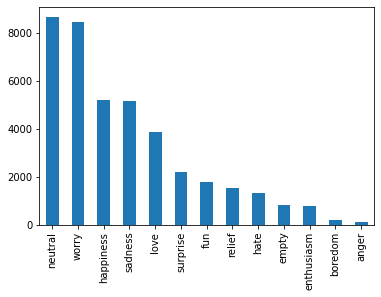

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')


##SVM
##Two Categories 

In [ ]:
data1_2cat

,sentiment,content
0,negetive,@tiffanylue i know i was listenin to bad habi...
1,negetive,Layin n bed with a headache ughhhh...waitin o...
2,negetive,Funeral ceremony...gloomy friday...
3,positive,wants to hang out with friends SOON!
4,negetive,@dannycastillo We want to trade with someone w...
...,...,...
39995,negetive,@JohnLloydTaylor
39996,positive,Happy Mothers Day All my love
39997,positive,Happy Mother's Day to all the mommies out ther...
39998,positive,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data1_2cat, 
                                         test_size=0.3, 
                                         random_state=42)

In [ ]:
data_train.sample(frac=1).head(30) # shuffle the df and pick first 5

,sentiment,content
14631,negetive,needs a new job either closer to home or worth...
14122,positive,@SHELLiZAY hmmm Essense awards would be fun......
39886,negetive,@kateblogs It's never too late - they just nee...
37302,positive,about to have some cake for my sister's birthday
29718,negetive,@mileysupportrs1 Definitley Miley
34008,negetive,"@Chioma_ [answer 10] how i dress? its easy, my..."
32330,positive,@MusikFareak i'm doing awesome! Rachel N had a...
3684,negetive,@dublins98dave me too! I am down 400 euro
16607,negetive,@SuprnaturlShana I'm sorry you're having a bad...
97,negetive,feels sad coz i wasnt able to play with the gu...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(data_train['content'])
test_vectors = vectorizer.transform(data_test['content'])

In [ ]:
print(train_vectors)

  (0, 1272)	0.32621843065899686
  (0, 2445)	0.32202403398679413
  (0, 4576)	0.19667957815634368
  (0, 4073)	0.15663164430005952
  (0, 3416)	0.21212857568931548
  (0, 2862)	0.11773774080113421
  (0, 3235)	0.17199576684781967
  (0, 4394)	0.15514141798965236
  (0, 1629)	0.2816060227953948
  (0, 2047)	0.10987822874732403
  (0, 2576)	0.2145596808932677
  (0, 3664)	0.12201839802136444
  (0, 2552)	0.28290111868790674
  (0, 3849)	0.21574027118176944
  (0, 4377)	0.2325577853879411
  (0, 4518)	0.21758795306224382
  (0, 4003)	0.08304453412175439
  (0, 2020)	0.1648070684491339
  (0, 2885)	0.31827201830988455
  (0, 229)	0.16972676946344725
  (0, 2107)	0.09912031679511049
  (0, 1874)	0.2446685300662589
  (1, 3438)	0.326948058799639
  (1, 3760)	0.2980774235301263
  (1, 4015)	0.18041786649280797
  :	:
  (27998, 4074)	0.2943302430273416
  (27998, 3808)	0.351837830623446
  (27998, 1619)	0.30884826989357134
  (27998, 683)	0.17710571051095356
  (27998, 4022)	0.21101737860280675
  (27998, 4434)	0.272300297

In [ ]:
print(test_vectors)

  (0, 2653)	0.7811304008686812
  (0, 1710)	0.6243679178487099
  (1, 4570)	0.3139808022825813
  (1, 4311)	0.24021557112853106
  (1, 4270)	0.18573539645693382
  (1, 4003)	0.10950988285796369
  (1, 3416)	0.2797315406755739
  (1, 3195)	0.2957712939559373
  (1, 2907)	0.24838854639550054
  (1, 2862)	0.15525942001420567
  (1, 2698)	0.12748888427721772
  (1, 2639)	0.43018053512346915
  (1, 2194)	0.16607610752854848
  (1, 1787)	0.21523077209167907
  (1, 1559)	0.14526104275539414
  (1, 885)	0.3144777392007921
  (1, 708)	0.36508001253106326
  (1, 230)	0.13112982452058125
  (2, 4587)	0.08915250440231594
  (2, 4150)	0.26059639841737287
  (2, 4003)	0.0732566709144974
  (2, 3970)	0.264090437646545
  (2, 3556)	0.208741952162324
  (2, 3483)	0.20269878649431766
  (2, 3247)	0.1404676575067587
  :	:
  (11998, 2848)	0.37119561286134284
  (11998, 2755)	0.2583724289315877
  (11998, 2698)	0.12685226581349365
  (11998, 2521)	0.15493851425789923
  (11998, 2020)	0.21624396913165203
  (11998, 1971)	0.216495859791

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(C = 2, kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
; t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])

Training time: 168.326187s; Prediction time: 24.898857s
positive:  {'precision': 0.6761853448275862, 'recall': 0.5385110491310877, 'f1-score': 0.5995461602770811, 'support': 4661}
negative:  {'precision': 0.7404681467181468, 'recall': 0.8362174683199346, 'f1-score': 0.7854354642605748, 'support': 7339}


In [ ]:
report

{'accuracy': 0.7205833333333334,
 'macro avg': {'f1-score': 0.6924908122688279,
  'precision': 0.7083267457728665,
  'recall': 0.6873642587255111,
  'support': 12000},
 'negetive': {'f1-score': 0.7854354642605748,
  'precision': 0.7404681467181468,
  'recall': 0.8362174683199346,
  'support': 7339},
 'positive': {'f1-score': 0.5995461602770811,
  'precision': 0.6761853448275862,
  'recall': 0.5385110491310877,
  'support': 4661},
 'weighted avg': {'f1-score': 0.7132329604383194,
  'precision': 0.7154996350838215,
  'recall': 0.7205833333333334,
  'support': 12000}}

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=rbf
classifier_linear = svm.SVC(C = 2, kernel='rbf')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])

Training time: 449.972295s; Prediction time: 40.871403s
positive:  {'precision': 0.6825653462678524, 'recall': 0.5434456125295001, 'f1-score': 0.6051122790253225, 'support': 4661}
negative:  {'precision': 0.7432742188442514, 'recall': 0.8394876686197029, 'f1-score': 0.7884566163296646, 'support': 7339}


In [ ]:
report

{'accuracy': 0.7245,
 'macro avg': {'f1-score': 0.6967844476774936,
  'precision': 0.7129197825560518,
  'recall': 0.6914666405746015,
  'support': 12000},
 'negetive': {'f1-score': 0.7884566163296646,
  'precision': 0.7432742188442514,
  'recall': 0.8394876686197029,
  'support': 7339},
 'positive': {'f1-score': 0.6051122790253225,
  'precision': 0.6825653462678524,
  'recall': 0.5434456125295001,
  'support': 4661},
 'weighted avg': {'f1-score': 0.717242619981703,
  'precision': 0.719693880921035,
  'recall': 0.7245,
  'support': 12000}}

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=sigmoid
classifier_linear = svm.SVC(C = 2, kernel='sigmoid')
t0 = time.time()
classifier_linear.fit(train_vectors, data_train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

In [ ]:
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(data_test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negetive'])

Training time: 104.564749s; Prediction time: 25.242597s
positive:  {'precision': 0.6663918658972245, 'recall': 0.5202746191804334, 'f1-score': 0.5843373493975904, 'support': 4661}
negative:  {'precision': 0.7325678746561416, 'recall': 0.8345823681700504, 'f1-score': 0.7802547770700636, 'support': 7339}


In [ ]:
report

{'accuracy': 0.7125,
 'macro avg': {'f1-score': 0.6822960632338271,
  'precision': 0.6994798702766831,
  'recall': 0.6774284936752419,
  'support': 12000},
 'negetive': {'f1-score': 0.7802547770700636,
  'precision': 0.7325678746561416,
  'recall': 0.8345823681700504,
  'support': 7339},
 'positive': {'f1-score': 0.5843373493975904,
  'precision': 0.6663918658972245,
  'recall': 0.5202746191804334,
  'support': 4661},
 'weighted avg': {'f1-score': 0.7041571828716139,
  'precision': 0.706864009920699,
  'recall': 0.7125,
  'support': 12000}}

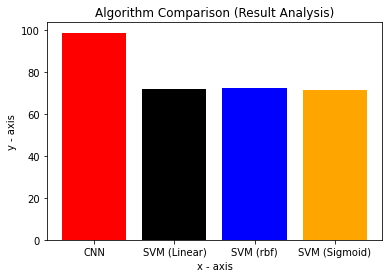

In [ ]:
import matplotlib.pyplot as plt 
  
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4] 
  
percent = [0.9878*100 , 0.72058*100, 0.7245*100, 0.7125*100] 
  
# labels for bars 
tick_label = ['CNN', 'SVM (Linear)', 'SVM (rbf)', 'SVM (Sigmoid)'] 
  
# plotting a bar chart 
plt.bar(left, percent, tick_label = tick_label, 
        width = 0.8, color = ['red', 'black', "blue", 'orange']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('Algorithm Comparison (Result Analysis)') 

# function to show the plot 
plt.show() 